In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [ ]:
# Example response

# {'base': 'model',
#  'clouds': {'all': 95},
#  'cod': 200,
#  'coord': {'lat': -24.79, 'lon': -50.01},
#  'dt': 1582181270,
#  'id': 3466704,
#  'main': {'feels_like': 294.67,
#           'grnd_level': 903,
#           'humidity': 97,
#           'pressure': 1011,
#           'sea_level': 1011,
#           'temp': 292.03,
#           'temp_max': 292.03,
#           'temp_min': 292.03},
#  'name': 'Castro',
#  'sys': {'country': 'BR', 'sunrise': 1582189771, 'sunset': 1582235907},
#  'timezone': -10800,
#  'weather': [{'description': 'overcast clouds',
#               'icon': '04n',
#               'id': 804,
#               'main': 'Clouds'}],
#  'wind': {'deg': 329, 'speed': 0.46}}

In [20]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
data_list = []

for c in cities:
    url = base_url + "q={}".format(c) + "&appid={}".format(weather_api_key) + "&units=imperial"
    resp = requests.get(url)
    
    # Check that city was found
    if resp.status_code == 200:
        data_list.append({
            "city": c,
            "country": resp.json()['sys']['country'],
            "date": resp.json()['dt'],
            "lat": resp.json()['coord']['lat'],
            "lon": resp.json()['coord']['lon'],
            "max_temp": resp.json()['main']['temp_max'],
            "temperature": resp.json()['main']['temp'],
            "humidity": resp.json()['main']['humidity'],
            "cloudiness": resp.json()['clouds']['all'],
            "wind speed": resp.json()['wind']['speed']
        })
    else:
        print(f"City {c} not found. Skipping...")

City illoqqortoormiut not found. Skipping...
City taolanaro not found. Skipping...
City palabuhanratu not found. Skipping...
City ningan not found. Skipping...
City samusu not found. Skipping...
City karaul not found. Skipping...
City belushya guba not found. Skipping...
City phan rang not found. Skipping...
City el wasta not found. Skipping...
City we not found. Skipping...
City alotau not found. Skipping...
City attawapiskat not found. Skipping...
City vaitupu not found. Skipping...
City kazalinsk not found. Skipping...
City marcona not found. Skipping...
City barentsburg not found. Skipping...
City ngukurr not found. Skipping...
City urdzhar not found. Skipping...
City tazirkah not found. Skipping...
City katsiveli not found. Skipping...
City tsihombe not found. Skipping...
City malwan not found. Skipping...
City toliary not found. Skipping...
City orgun not found. Skipping...
City amderma not found. Skipping...
City umzimvubu not found. Skipping...
City rawannawi not found. Skippin

In [21]:
# Convert data to dataframe
df = pd.DataFrame(data_list)
print(len(df))
df.head()

560


,city,country,date,lat,lon,max_temp,temperature,humidity,cloudiness,wind speed
0,castro,BR,1582183000,-24.79,-50.01,65.98,65.98,97,95,1.03
1,busselton,AU,1582183001,-33.65,115.33,93.99,92.73,9,0,2.68
2,zyukayka,RU,1582183001,58.20,54.70,31.37,31.37,93,91,8.93
3,robore,BO,1582183001,-18.33,-59.75,76.57,76.57,83,95,1.70
4,rikitea,PF,1582183001,-23.12,-134.97,78.49,78.49,80,14,14.50


In [23]:
df.to_csv(output_data_file)

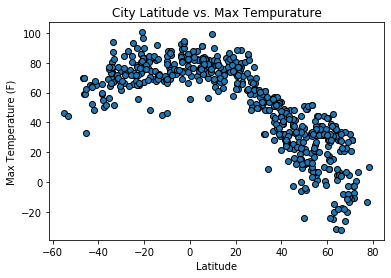

In [31]:
plt.title("City Latitude vs. Max Tempurature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.scatter(df.lat, df.max_temp, edgecolors='black')

plt.show()

The above scatter plot shows the relationship between temperature and latitude. As latitude approaches zero from the left or right, temperature increases, and reaches an absolute maximum at 0 degrees latitude which is the equator.

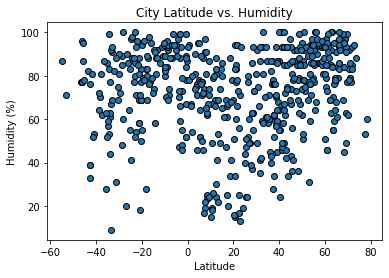

In [32]:
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(df.lat, df.humidity, edgecolors='black')

plt.show()

The above scatter plot shows the relationship between latitude and humidity. From the scatter plot, it seems like there is actually very litte relationship betwen the two variables

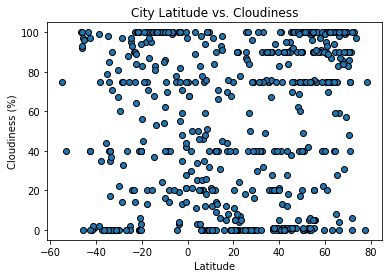

In [33]:
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(df.lat, df.cloudiness, edgecolors='black')

plt.show()

From the scatter plot above it seems like there is also very litte relationship between cloudiness and latitude. However, there seem to be concentrations of points at 0%, 40%, ~80%, and 100%. I wonder what is going on there..

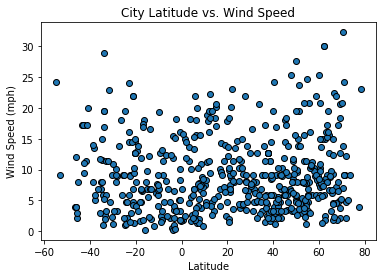

In [35]:
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.scatter(df.lat, df['wind speed'], edgecolors='black')

plt.show()

Again, very little relationship between latitude and windspeed. It seems like latitude is only a good predictor of temperature.